# Part 2: Data Inspection, Cleaning and Wrangling in Python
## Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  


Author: Mark Bauer

Table of Contents
=================

   Getting Started
          
   1. Importing Libraries 
   2. Reading in Data as a pandas Dataframe      
   3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values 
   4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Filtering Data
       * 4.4 Create New Columns
       * 4.5 Filling In or Dropping Null Values 
   5. Sample Analysis
       * 5.1. Line Plot of Year Built
       * 5.2. Identify Oldest Building in Dataset  
   6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset

![building_footprints_csv](images/building-footprints-csv.png)
Screenshot of link address.

Dataset Link: https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

Documentation: https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

printing verions of Python modules and packages with **watermark** documention for installing watermark: https://github.com/rasbt/watermark.

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

numpy     : 1.23.4
pandas    : 1.5.1
matplotlib: 3.6.2
seaborn   : 0.12.1



# 2. Reading in Data as a pandas Dataframe

In [3]:
# reading in data as a pandas dataframe assigned to building_df
path = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_df = pd.read_csv(path)

# preview data
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


# 3. Data Inspection
## 3.1 Previewing Data

In [4]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [5]:
# previewing the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1083101,MULTIPOLYGON (((-73.93970312052463 40.70024464...,NaN,3427437,1931.0,08/30/2024 12:00:00 AM,Constructed,32656,25.040000,2100,38.0,0,0,3031320113,3031320113,Other (Man,{0F7C5E77-0A77-4AAE-94C9-64CDF52ADD9D}
1083102,MULTIPOLYGON (((-73.98928170927698 40.68173770...,NaN,3427438,2016.0,08/30/2024 12:00:00 AM,Constructed,1302450,51.000000,2100,13.0,0,0,3004160053,3004160053,Other (Man,{29E84B32-8E32-408E-96AA-DB0F60DF91F2}
1083103,MULTIPOLYGON (((-73.99190407584891 40.69302272...,NaN,3427442,1914.0,08/30/2024 12:00:00 AM,Constructed,1302454,39.539176,2100,64.0,0,0,3002550012,3002550012,Other (Man,{9B2DD7D1-F0A1-41D9-9240-44B9A15A8038}
1083104,MULTIPOLYGON (((-73.99213857947052 40.69277855...,NaN,3427441,1914.0,08/30/2024 12:00:00 AM,Constructed,1302453,39.539176,2100,64.0,0,0,3002550014,3002550014,Other (Man,{70CF0B39-B799-4DB1-A571-7E440FF19361}
1083105,MULTIPOLYGON (((-73.90607854429192 40.69343575...,NaN,3427439,2013.0,08/30/2024 12:00:00 AM,Constructed,1262925,43.000000,2100,72.0,0,0,3034190028,3034190028,Other (Man,{2705C7E6-6178-48ED-8552-972D56718B52}


In [6]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1083106, 16)

In [7]:
# more readable
rows, columns = building_df.shape
print(f'This dataset has {rows:,} rows and {columns:,} columns.')

This dataset has 1,083,106 rows and 16 columns.


In [8]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [9]:
# printing the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [10]:
# notice the difference of type from series to dataframe
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
# print list of columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE', 'GLOBALID'],
      dtype='object')

In [12]:
# printing the datatypes of columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE       int64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
GLOBALID       object
dtype: object

In [13]:
# printing the names, non-null counts and datatypes of columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083106 entries, 0 to 1083105
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1083106 non-null  object 
 1   NAME        2247 non-null     object 
 2   BIN         1083106 non-null  int64  
 3   CNSTRCT_YR  1072859 non-null  float64
 4   LSTMODDATE  1083106 non-null  object 
 5   LSTSTATYPE  1082777 non-null  object 
 6   DOITT_ID    1083106 non-null  int64  
 7   HEIGHTROOF  1080528 non-null  float64
 8   FEAT_CODE   1083106 non-null  int64  
 9   GROUNDELEV  1082554 non-null  float64
 10  SHAPE_AREA  1083106 non-null  int64  
 11  SHAPE_LEN   1083106 non-null  int64  
 12  BASE_BBL    1083106 non-null  int64  
 13  MPLUTO_BBL  1083106 non-null  int64  
 14  GEOMSOURCE  1082810 non-null  object 
 15  GLOBALID    1083106 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 132.2+ MB


In [14]:
# printing RangeIndex
building_df.index

RangeIndex(start=0, stop=1083106, step=1)

In [15]:
# printing True/False if column is unique on our unique key (DOITT_ID)
building_df['DOITT_ID'].is_unique

True

## 3.2 Calculating Summary Statistics

In [16]:
# printing descriptive statistics of our numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.083106e+06,1.072859e+06,1.083106e+06,1.080528e+06,1.083106e+06,1.082554e+06,1083106.0,1083106.0,1.083106e+06,1.083106e+06
mean,3.713041e+06,1.939661e+03,5.950948e+05,2.770927e+01,2.693287e+03,5.512671e+01,0.0,0.0,3.564203e+09,3.564203e+09
std,1.026655e+06,2.950607e+01,3.623746e+05,2.182553e+01,1.198332e+03,4.154991e+01,0.0,0.0,9.858404e+08,9.858404e+08
min,1.000000e+06,1.652000e+03,1.000000e+00,0.000000e+00,1.000000e+03,-1.600000e+01,0.0,0.0,1.000010e+09,1.000010e+09
25%,3.129718e+06,1.920000e+03,2.881752e+05,1.853000e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043390e+09,3.043390e+09
50%,4.067922e+06,1.930000e+03,5.765265e+05,2.613000e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019570e+09,4.019570e+09
75%,4.483494e+06,1.955000e+03,8.667342e+05,3.114000e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.107010e+09,4.107010e+09
max,5.799523e+06,2.024000e+03,1.302455e+06,1.550000e+03,5.110000e+03,1.335000e+03,0.0,0.0,6.000000e+09,6.000000e+09


In [17]:
# printing descriptive statistics of our non-numeric columns (e.g. strings)
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE,GLOBALID
count,1083106,2247,1083106,1082777,1082810,1083106
unique,1083106,1889,1866,12,3,1083106
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
freq,1,52,799886,1080435,1011437,1


In [18]:
# returning the mode of CNSTRCT_YR and NAME
(building_df
 .loc[:, ['CNSTRCT_YR', 'NAME']]
 .mode()
 .rename(index={0: "mode"})
)

,CNSTRCT_YR,NAME
mode,1920.0,Adler Place Town Houses


In [19]:
# value counts of the CNSTRCT_YR column - top 10
(building_df['CNSTRCT_YR']
 .value_counts()
 .head(10)
)

1920.0    130020
1930.0    112438
1925.0    108964
1950.0     62611
1910.0     52183
1940.0     51191
1960.0     40723
1935.0     38509
1931.0     36640
1945.0     34015
Name: CNSTRCT_YR, dtype: int64

In [20]:
# value counts of the NAME column - top 10
(building_df['NAME']
 .value_counts()
 .head(10)
)

Adler Place Town Houses     52
Cooper Place Town Houses    38
Broun Place Town Houses     36
Debs Place Town Houses      34
Defoe Place Town Houses     26
Asch Loop Town Houses       18
Earhart Lane Town Houses    16
NO NAME                      9
Restrooms                    8
Kimball Block                6
Name: NAME, dtype: int64

In [21]:
# group by 'LSTSTATYPE', count of rows
(building_df
 .groupby(by='LSTSTATYPE')['DOITT_ID']
 .count()
)

LSTSTATYPE
Alteration                     1499
Constructed                 1080435
Correction                       68
Demolition                       13
Geometry                         17
Initialization                  111
Investigate Construction         50
Investigate Demolition            5
Marked for Construction          21
Marked for Demolition           129
Merged                           92
Split                           337
Name: DOITT_ID, dtype: int64

In [22]:
# group by 'FEAT_CODE', mean value of 'HEIGHTROOF' and 'GROUNDELEV'
(building_df
 .groupby(by='FEAT_CODE')[['HEIGHTROOF', 'GROUNDELEV']]
 .mean()
 .rename(columns={'HEIGHTROOF':'HEIGHTROOF_avg', 'GROUNDELEV':'GROUNDELEV_avg'})
)

,HEIGHTROOF_avg,GROUNDELEV_avg
FEAT_CODE,,
1000,14.853740,39.965517
1001,18.060071,55.975000
1003,212.500000,50.880000
1004,17.081468,31.788288
1005,25.180486,29.217391
1006,367.722222,38.333333
2100,31.631185,55.105993
2110,54.010564,37.617391
5100,98.196353,52.203488


In [23]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
)

count
LSTSTATYPE               FEAT_CODE        
Alteration               1004            3
                         2100         1429
                         5100            2
                         5110           65
Constructed              1000           85
                         1001          123
                         1003            7
                         1004          221
                         1005           24
                         1006           17
                         2100       866398
                         2110          123
                         5100          103
                         5110       213334
Correction               2100           49
                         5100            1
                         5110           18
Demolition               2100           10
                         5110            3
Geometry                 1000           10
                         2100            7
Initialization           1003            6
                         1004            1
                         1006            1
                         2100           47
                         5100           52
                         5110            4
Investigate Construction 2100           34
                         5100           13
                         5110            3
Investigate Demolition   2100            5
Marked for Construction  1003           12
                         2100            6
                         5100            3
Marked for Demolition    1003            2
                         2100          110
                         5110           17
Merged                   2100           91
                         5110            1
Split                    1000            1
                         1004            2
                         2100          329
                         5110            5

In [24]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows and explode the indexes
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
 .reset_index()
)

,LSTSTATYPE,FEAT_CODE,count
0,Alteration,1004,3
1,Alteration,2100,1429
2,Alteration,5100,2
3,Alteration,5110,65
4,Constructed,1000,85
5,Constructed,1001,123
6,Constructed,1003,7
7,Constructed,1004,221
8,Constructed,1005,24
9,Constructed,1006,17


In [25]:
# compute pairwise correlation of columns, excluding null values
building_df.corr(numeric_only=True)

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,0.290448,0.156182,-0.357052,0.190987,0.087047,NaN,NaN,0.988677,0.988677
CNSTRCT_YR,0.290448,1.000000,0.205393,0.026888,-0.132434,-0.002974,NaN,NaN,0.284157,0.284157
DOITT_ID,0.156182,0.205393,1.000000,-0.158557,0.539215,-0.017022,NaN,NaN,0.075763,0.075763
HEIGHTROOF,-0.357052,0.026888,-0.158557,1.000000,-0.362512,-0.002643,NaN,NaN,-0.327788,-0.327788
FEAT_CODE,0.190987,-0.132434,0.539215,-0.362512,1.000000,0.001680,NaN,NaN,0.090460,0.090460
GROUNDELEV,0.087047,-0.002974,-0.017022,-0.002643,0.001680,1.000000,NaN,NaN,0.106184,0.106184
SHAPE_AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHAPE_LEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASE_BBL,0.988677,0.284157,0.075763,-0.327788,0.090460,0.106184,NaN,NaN,1.000000,1.000000
MPLUTO_BBL,0.988677,0.284157,0.075763,-0.327788,0.090460,0.106184,NaN,NaN,1.000000,1.000000


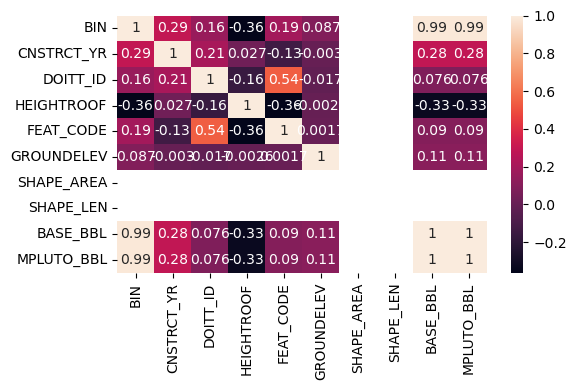

In [26]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(
    building_df.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

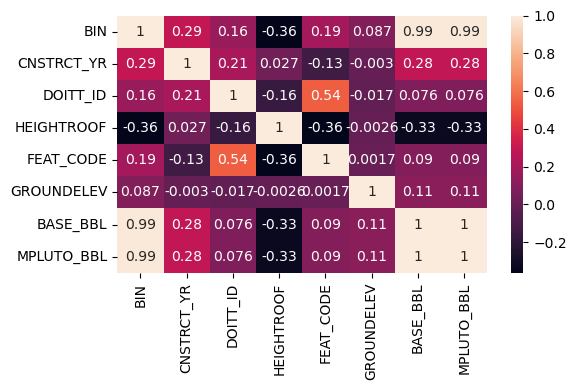

In [27]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(6, 4))

# dropping columns of all nulls
corr_df = building_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(
    corr_df.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null Values

In [28]:
# total nulls in dataframe
null_count = (
    building_df
    .isnull()
    .sum()
    .sum()
)

print(f'total nulls in dataframe: {null_count:,}')

total nulls in dataframe: 1,094,861


In [29]:
# total non-nulls in dataframe
nonnull_count = (
    building_df
    .notnull()
    .sum()
    .sum()
)

print(f'total non-nulls in dataframe: {nonnull_count:,}')

total non-nulls in dataframe: 16,234,835


In [30]:
# nulls per column sorted descending
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

NAME          1080859
CNSTRCT_YR      10247
HEIGHTROOF       2578
GROUNDELEV        552
LSTSTATYPE        329
GEOMSOURCE        296
the_geom            0
BIN                 0
LSTMODDATE          0
DOITT_ID            0
FEAT_CODE           0
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
GLOBALID            0
dtype: int64

In [31]:
# calculating a percentage of the number of nulls to total number of records of each column
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
 .div(building_df.shape[0])
 .mul(100)
)

NAME          99.792541
CNSTRCT_YR     0.946075
HEIGHTROOF     0.238019
GROUNDELEV     0.050965
LSTSTATYPE     0.030376
GEOMSOURCE     0.027329
the_geom       0.000000
BIN            0.000000
LSTMODDATE     0.000000
DOITT_ID       0.000000
FEAT_CODE      0.000000
SHAPE_AREA     0.000000
SHAPE_LEN      0.000000
BASE_BBL       0.000000
MPLUTO_BBL     0.000000
GLOBALID       0.000000
dtype: float64

In [32]:
# % null as a dataframe
missing_data = (building_df.isnull().sum() / building_df.shape[0]) * 100

# creating a dataframe
missing_df = pd.DataFrame(
    missing_data, columns=['perc_missing']
)

missing_df.sort_values(by='perc_missing', ascending=False)

,perc_missing
NAME,99.792541
CNSTRCT_YR,0.946075
HEIGHTROOF,0.238019
GROUNDELEV,0.050965
LSTSTATYPE,0.030376
GEOMSOURCE,0.027329
the_geom,0.000000
BIN,0.000000
LSTMODDATE,0.000000
DOITT_ID,0.000000


In [33]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083101,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083102,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083103,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083104,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# return a boolean if any of the values are null in column
(building_df
 .isnull()
 .any()
)

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE     False
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE     True
GLOBALID      False
dtype: bool

In [35]:
# return a boolean same-sized object of nulls in NAME column
building_df['NAME'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1083101    False
1083102    False
1083103    False
1083104    False
1083105    False
Name: NAME, Length: 1083106, dtype: bool

In [36]:
# returning rows with non-null values in NAME column
building_df.loc[building_df['NAME'].notnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
3576,MULTIPOLYGON (((-73.95317216502298 40.75924424...,Roosevelt Isld Subway Station,1089270,1975.0,03/25/2008 12:00:00 AM,Constructed,996736,28.470000,2100,16.0,0,0,1013730001,1013730001,Photogramm,{E49130B9-6088-4BB5-9BA5-ABA8BFC69BA7}
4308,MULTIPOLYGON (((-73.88526375915657 40.86258229...,Alpha House,2102033,1922.0,08/17/2017 12:00:00 AM,Constructed,194515,22.560000,5110,98.0,0,0,2032730001,2032730001,Photogramm,{8A21945E-76A9-47A7-9355-2D500A91A949}
5786,MULTIPOLYGON (((-73.88149603905721 40.84855265...,Pheasant Aviary,2123889,1905.0,07/17/2014 12:00:00 AM,Constructed,925752,22.075648,2100,70.0,0,0,2031200020,2031200020,Photogramm,{2BCDE23D-4DD7-4642-8FC1-B347EDE772CA}
7976,MULTIPOLYGON (((-73.8312596282937 40.871147879...,Asch Loop Town Houses,2128807,1969.0,08/22/2017 12:00:00 AM,Constructed,197782,26.450000,2100,18.0,0,0,2051410120,2051410120,Photogramm,{E7006798-10CF-49AA-BE4E-A1039405D38A}
8131,MULTIPOLYGON (((-73.90110014758918 40.73308422...,NO NAME,4597316,1940.0,08/17/2017 12:00:00 AM,Constructed,786648,11.000000,5110,68.0,0,0,4023750180,4023750180,Other (Man,{E2CADF8E-D955-4BD4-AEED-0EFC3A2149C4}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080837,MULTIPOLYGON (((-73.85265384411393 40.86979051...,Eastchester Playground-Comfort Station,2125424,1949.0,04/16/2024 12:00:00 AM,Constructed,455210,14.000000,2100,77.0,0,0,2045810002,2045810002,Other (Man,{9D2E3969-E778-4A78-B689-ABAA7CD9C84C}
1080989,MULTIPOLYGON (((-74.01066784278217 40.71190680...,Tower 2 World Trade Ctr,1089308,2023.0,05/06/2024 12:00:00 AM,Constructed,1256146,41.883905,2100,20.0,0,0,1000580001,1000580001,Other (Man,{25251D04-C615-4866-B45B-2885FACDDF0D}
1081326,MULTIPOLYGON (((-73.79566736659639 40.65514293...,83,4542282,1994.0,02/22/2024 12:00:00 AM,Alteration,1260149,41.000000,2100,9.0,0,0,4142600001,4142600001,Other (Man,{DC541EA1-0B7F-4E54-94A3-E8A2F61F8DFF}
1081416,MULTIPOLYGON (((-73.95209408465293 40.78829631...,Building B,1091029,1992.0,08/25/2023 12:00:00 AM,Split,1300335,328.810000,1000,53.0,0,0,1016040023,1016040023,Other (Man,{E1111641-540E-4E76-86BC-81A88443EC5B}


In [37]:
# returning rows with null values in NAME column
building_df.loc[building_df['NAME'].isnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083101,MULTIPOLYGON (((-73.93970312052463 40.70024464...,NaN,3427437,1931.0,08/30/2024 12:00:00 AM,Constructed,32656,25.040000,2100,38.0,0,0,3031320113,3031320113,Other (Man,{0F7C5E77-0A77-4AAE-94C9-64CDF52ADD9D}
1083102,MULTIPOLYGON (((-73.98928170927698 40.68173770...,NaN,3427438,2016.0,08/30/2024 12:00:00 AM,Constructed,1302450,51.000000,2100,13.0,0,0,3004160053,3004160053,Other (Man,{29E84B32-8E32-408E-96AA-DB0F60DF91F2}
1083103,MULTIPOLYGON (((-73.99190407584891 40.69302272...,NaN,3427442,1914.0,08/30/2024 12:00:00 AM,Constructed,1302454,39.539176,2100,64.0,0,0,3002550012,3002550012,Other (Man,{9B2DD7D1-F0A1-41D9-9240-44B9A15A8038}
1083104,MULTIPOLYGON (((-73.99213857947052 40.69277855...,NaN,3427441,1914.0,08/30/2024 12:00:00 AM,Constructed,1302453,39.539176,2100,64.0,0,0,3002550014,3002550014,Other (Man,{70CF0B39-B799-4DB1-A571-7E440FF19361}


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## 4.1 Previewing Column Values

In [38]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1083101    1931.0
1083102    2016.0
1083103    1914.0
1083104    1914.0
1083105    2013.0
Name: CNSTRCT_YR, Length: 1083106, dtype: float64

In [39]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets with .loc method
building_df.loc[:, ["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1083101,1931.0
1083102,2016.0
1083103,1914.0
1083104,1914.0


In [40]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
955513,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
430835,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110,63.0,0,0,4050130006,4050130006,Photogramm,{36678A28-E8EE-45E8-BAA2-9A3F5118E176}
710320,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52827,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
521520,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}


In [41]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1078167,MULTIPOLYGON (((-74.14990289776875 40.58884084...,NaN,5175386,2024.0,08/12/2024 12:00:00 AM,Constructed,1302348,29.000000,2100,137.0,0,0,5023750134,5023750134,Other (Man,{D5A45DB3-D0F1-4522-A85F-82F3FA21A9C4}
1081317,MULTIPOLYGON (((-73.87248318649782 40.76183155...,NaN,4607934,2024.0,08/01/2024 12:00:00 AM,Constructed,1302312,28.830000,2100,53.0,0,0,4013760018,4013760018,Other (Man,{9A2BE175-6856-4C0A-9C59-D91F336319B3}
1081335,MULTIPOLYGON (((-73.75873562524143 40.65792348...,NaN,4625015,2024.0,05/23/2024 12:00:00 AM,Constructed,1302096,14.008325,5110,7.0,0,0,4134360028,4134360028,Photogramm,{09E12932-17C2-4D9B-9B47-3FF9DD741DFD}
1081334,MULTIPOLYGON (((-73.75873562524143 40.65792348...,NaN,4625014,2024.0,05/23/2024 12:00:00 AM,Constructed,1302095,14.008325,5110,7.0,0,0,4134360029,4134360029,Photogramm,{73BF6EDA-1554-4B2C-854B-A3E8B6CE0AD7}
1078414,MULTIPOLYGON (((-74.15015170157127 40.58867942...,NaN,5175392,2024.0,08/12/2024 12:00:00 AM,Constructed,1302358,30.000000,2100,135.0,0,0,5023730041,5023730041,Other (Man,{3E7D31D0-4CE8-4150-A2EA-D111363D4794}


In [42]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
(building_df
 .sort_values('CNSTRCT_YR', ascending=False)
 .loc[:, ['CNSTRCT_YR']]
 .head()
)

,CNSTRCT_YR
1078167,2024.0
1081317,2024.0
1081335,2024.0
1081334,2024.0
1078414,2024.0


In [43]:
# descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

building_df['CNSTRCT_YR'].describe().round(2)

count    1072859.00
mean        1939.66
std           29.51
min         1652.00
25%         1920.00
50%         1930.00
75%         1955.00
max         2024.00
Name: CNSTRCT_YR, dtype: float64

## 4.2 Exploring Distribution of Values

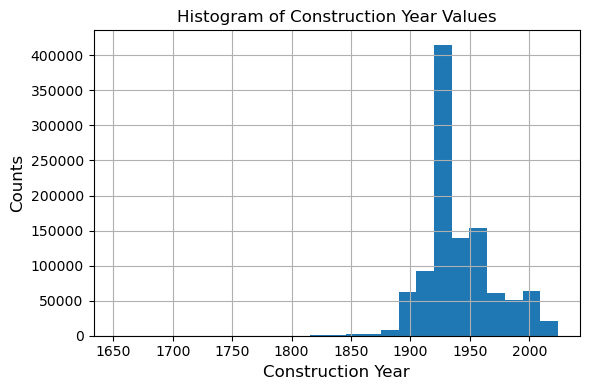

In [44]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
fig, ax = plt.subplots(figsize=(6, 4))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=25
)

# adding labels
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12) 
plt.title('Histogram of Construction Year Values', fontsize=12) 

plt.tight_layout()

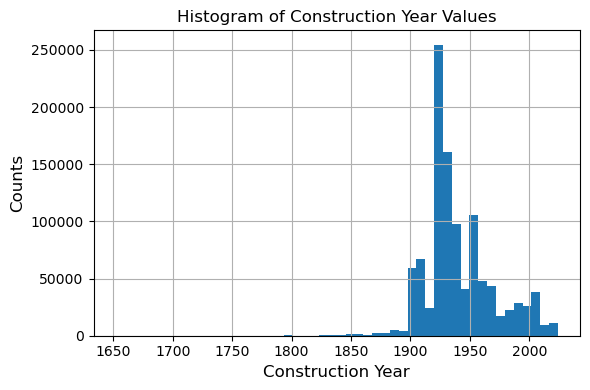

In [45]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
fig, ax = plt.subplots(figsize=(6, 4))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=50
)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values', fontsize=12)

plt.tight_layout()

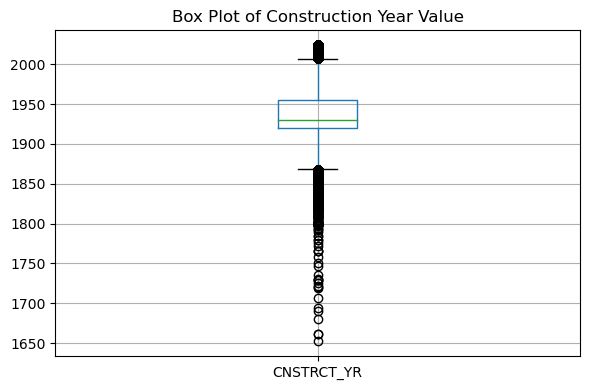

In [46]:
# making a box plot from our 'CNSTRCT_YR' column
fig, ax = plt.subplots(figsize=(6, 4))

building_df.boxplot(
    column=['CNSTRCT_YR'], 
    ax=ax
)

plt.title('Box Plot of Construction Year Value', fontsize=12)

plt.tight_layout()

## 4.3 Filtering Data

df.iloc: Purely integer-location based indexing for selection by position.

In [47]:
# first row, first column
building_df.iloc[0, 0]

'MULTIPOLYGON (((-73.96664570466969 40.62599676998366, -73.96684846176461 40.625977490862574, -73.96685938726297 40.62604419372411, -73.96661621040211 40.62606731716107, -73.96660638332114 40.626007324369795, -73.96664680403327 40.626003480977275, -73.96664570466969 40.62599676998366)))'

In [48]:
# first row, start at second column return all columns
building_df.iloc[0, 1:]

NAME                                             NaN
BIN                                          3170958
CNSTRCT_YR                                    1925.0
LSTMODDATE                    08/22/2017 12:00:00 AM
LSTSTATYPE                               Constructed
DOITT_ID                                       96807
HEIGHTROOF                                 29.749853
FEAT_CODE                                       2100
GROUNDELEV                                      40.0
SHAPE_AREA                                         0
SHAPE_LEN                                          0
BASE_BBL                                  3065220021
MPLUTO_BBL                                3065220021
GEOMSOURCE                                Photogramm
GLOBALID      {31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
Name: 0, dtype: object

In [49]:
# first row, start at second column up to the last
building_df.iloc[0, 1:-1]

NAME                             NaN
BIN                          3170958
CNSTRCT_YR                    1925.0
LSTMODDATE    08/22/2017 12:00:00 AM
LSTSTATYPE               Constructed
DOITT_ID                       96807
HEIGHTROOF                 29.749853
FEAT_CODE                       2100
GROUNDELEV                      40.0
SHAPE_AREA                         0
SHAPE_LEN                          0
BASE_BBL                  3065220021
MPLUTO_BBL                3065220021
GEOMSOURCE                Photogramm
Name: 0, dtype: object

In [50]:
# specify row and column positions
building_df.iloc[[0, 5, 10], [0, 2, 5, 8]]

,the_geom,BIN,LSTSTATYPE,FEAT_CODE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,3170958,Constructed,2100
5,MULTIPOLYGON (((-74.14644228489016 40.58885592...,5122427,Constructed,2100
10,MULTIPOLYGON (((-74.1344861688728 40.600563532...,5034441,Constructed,2100


df.loc: Access a group of rows and columns by label(s) or a boolean array.

In [51]:
# locate rows where construction year > 2000
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [52]:
# locate construction year > 2000, columns 'BIN', 'CNSTRCT_YR'
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000, ['BIN', 'CNSTRCT_YR']]
 .head()
)

,BIN,CNSTRCT_YR
6,5133580,2001.0
50,3394646,2009.0
80,3072927,2003.0
98,3390096,2004.0
224,4555084,2004.0


In [53]:
# locate construction year greater than 2000 but less than 2020
(building_df
 .loc[(building_df['CNSTRCT_YR'] > 2000)
      & (building_df['CNSTRCT_YR'] < 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [54]:
# locate construction year between 2000 and 2020 inclusive
(building_df
 .loc[building_df['CNSTRCT_YR'].between(2000, 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.040000,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}


In [55]:
# locate construction year value is in list
years = [2000, 2020]

(building_df
 .loc[building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.04,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
195,MULTIPOLYGON (((-74.13556237981483 40.64013483...,NaN,5132682,2000.0,08/22/2017 12:00:00 AM,Constructed,926272,29.08,2100,28.0,0,0,5010750122,5010750122,Photogramm,{6E88B8D1-E1FC-4421-BC53-42D3C4BCFE52}
451,MULTIPOLYGON (((-73.87150759130621 40.75533109...,NaN,4538129,2000.0,12/07/2018 12:00:00 AM,Constructed,1108486,38.00,2100,78.0,0,0,4017110040,4017110040,Other (Man,{E48501F8-F7F6-4B20-879D-20D8ED1F0DF3}
552,MULTIPOLYGON (((-74.0658246076789 40.592294919...,NaN,5132135,2000.0,12/07/2018 12:00:00 AM,Constructed,922090,31.00,2100,10.0,0,0,5031230005,5031230005,Other (Man,{D33FC432-28B1-4B87-A9FE-327923A7B9D1}
1268,MULTIPOLYGON (((-73.79809509137095 40.67312203...,NaN,4536134,2000.0,08/22/2017 12:00:00 AM,Constructed,960214,25.54,2100,32.0,0,0,4120600066,4120600066,Photogramm,{81BEA7A2-37AE-4BB3-8565-A43BCF9263C8}


In [56]:
# locate construction year value not in list
years = [2000, 2020]

(building_df
 .loc[~building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


## 4.4 Create New Columns

In [57]:
# create flag for buildings built after 2020, 1 (True) and 0 (False)
new_cols_df = building_df.copy()

new_cols_df.loc[new_cols_df['CNSTRCT_YR'] > 2020, ['after2020_flag']] = 1
new_cols_df['after2020_flag'] = new_cols_df['after2020_flag'].fillna(0).astype(int)

new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0


In [58]:
# create new column rounding HEIGHTROOF
new_cols_df['HEIGHTROOF_round'] = new_cols_df['HEIGHTROOF'].round(0)

new_cols_df.loc[:, ['HEIGHTROOF', 'HEIGHTROOF_round']].head()

,HEIGHTROOF,HEIGHTROOF_round
0,29.749853,30.0
1,22.630000,23.0
2,35.760000,36.0
3,37.500000,38.0
4,18.015113,18.0


## 4.5 Filling In or Dropping Null Values for CNSTRCT_YR

In [59]:
nulls = building_df.isnull().sum().sum()
print(f'total nulls: {nulls:,}')

# dropping all records where 'CNSTRCT_YR' as null
nulls = (
    building_df
    .dropna(subset=['CNSTRCT_YR'])
    .isnull()
    .sum()
    .sum()
)

print(f'total nulls after dropping nulls in CNSTRCT_YR: {nulls:,}')

total nulls: 1,094,861
total nulls after dropping nulls in CNSTRCT_YR: 1,073,432


In [60]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()

print(f'number of nulls for CNSTRCT_YR: {counts:,}')

number of nulls for CNSTRCT_YR: 10,247


In [61]:
median = building_df_fillna['CNSTRCT_YR'].median()

print('median value of CNSTRCT_YR: {}'.format(median))

median value of CNSTRCT_YR: 1930.0


In [62]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)

building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [63]:
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()

print(f'number of nulls for CNSTRCT_YR: {counts:,}')

number of nulls for CNSTRCT_YR: 0


# 5. Sample Analysis

## 5.1 Line Plot of Year Built

In [64]:
# returning number of buildings by year
year_df = (
    building_df
    .dropna(subset=['CNSTRCT_YR'])
    .astype({'CNSTRCT_YR':int})
    .groupby('CNSTRCT_YR')[['DOITT_ID']]
    .count()
    .reset_index()
    .rename({'DOITT_ID': 'count'}, axis=1)
    .set_index('CNSTRCT_YR', drop=True)
)

year_df.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


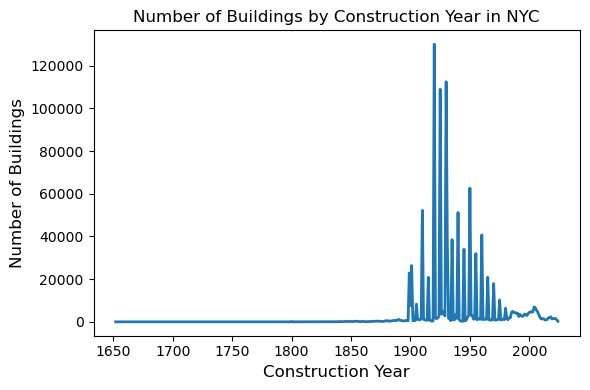

In [65]:
fig, ax = plt.subplots(figsize=(6, 4))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['count'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [66]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
year_df['cumsum'] = year_df['count'].cumsum()

# previewing first five rows
year_df.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


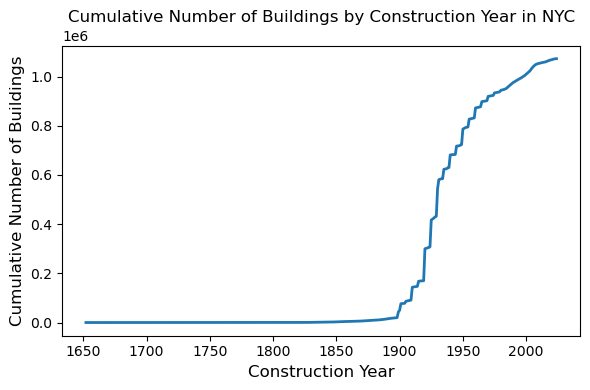

In [67]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(year_df['cumsum'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Identify Oldest Building in Dataset

Sorting by the 'CNSTRCT_YR' in ascending order and dropping records that don't have a building name (i.e. NAME).

In [68]:
(building_df
 .sort_values(by='CNSTRCT_YR')
 .dropna(subset=['NAME'])
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
955513,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
710320,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52827,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
521520,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}
503732,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100,7.0,0,0,1000070035,1000070035,Photogramm,{4B8DF813-9EAD-402A-81D9-58ECCB4ED502}


In [69]:
# identifying the oldest building with a building name in this dataset and
oldest = (
    building_df
    .sort_values(by='CNSTRCT_YR')
    .dropna(subset=['NAME'])
    .head(1)
)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
955513,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset.

Screenshot of Pieter Claesen Wyckoff House from Wikipedia:

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace null values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting values. In Part III, we will focus on data visualization.